In [11]:
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import gaussian_filter
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import seaborn as sns

import matplotlib
from matplotlib.gridspec import GridSpec
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as imag
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mticker
import types

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch

import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import csv
import pandas as pd
import os

In [12]:
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (0, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72.0))


def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)

In [13]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

z = 30

In [15]:
Sherpa_Heat_x_target_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Truth_Heat.npy')
Sherpa_Heat_x_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Prediction_Heat.npy')
Sherpa_Heat_lon_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Spacing_Heat.npy')

Sherpa_Heat_y_target_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Truth_Heat.npy')
Sherpa_Heat_y_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Prediction_Heat.npy')
Sherpa_Heat_lat_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Spacing_Heat.npy')

Sherpa_Moisture_x_target_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Truth_Moisture.npy')
Sherpa_Moisture_x_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Prediction_Moisture.npy')
Sherpa_Moisture_lon_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Spacing_Moisture.npy')

Sherpa_Moisture_y_target_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Truth_Moisture.npy')
Sherpa_Moisture_y_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Prediction_Moisture.npy')
Sherpa_Moisture_lat_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Spacing_Moisture.npy')

Linear_Heat_x_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Prediction_Heat_Linear.npy')
Linear_Heat_lon_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Spacing_Heat_Linear.npy')

Linear_Heat_y_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Prediction_Heat_Linear.npy')
Linear_Heat_lat_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Spacing_Heat_Linear.npy')

Linear_Moisture_x_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Prediction_Moisture_Linear.npy')
Linear_Moisture_lon_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_X_Spectral_Spacing_Moisture_Linear.npy')

Linear_Moisture_y_test_avg = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Prediction_Moisture_Linear.npy')
Linear_Moisture_lat_spacing = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_Y_Spectral_Spacing_Moisture_Linear.npy')

CAM_Moisture_x_target_avg = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_Moisture_X.npy")
CAM_Heat_x_target_avg = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_Heat_X.npy")
CAM_Moisture_lon_spacing = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_freqs_Moisture_X.npy")
CAM_Heat_lon_spacing = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_freqs_Heat_X.npy")

CAM_Moisture_y_target_avg = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_Moisture_Y.npy")
CAM_Heat_y_target_avg = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_Heat_Y.npy")
CAM_Moisture_lat_spacing = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_freqs_Moisture_Y.npy")
CAM_Heat_lat_spacing = np.load("/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/Spatial_CAM_Spectra_freqs_Heat_Y.npy")


In [16]:
SPCAM5_X_Freqs = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM5_X_Spectral_Spacing.npy')
SPCAM5_Y_Freqs = np.load('/fast/gmooers/Real_Geography_Manuscript/Data_For_Paper/SPCAM5_Y_Spectral_Spacing.npy')

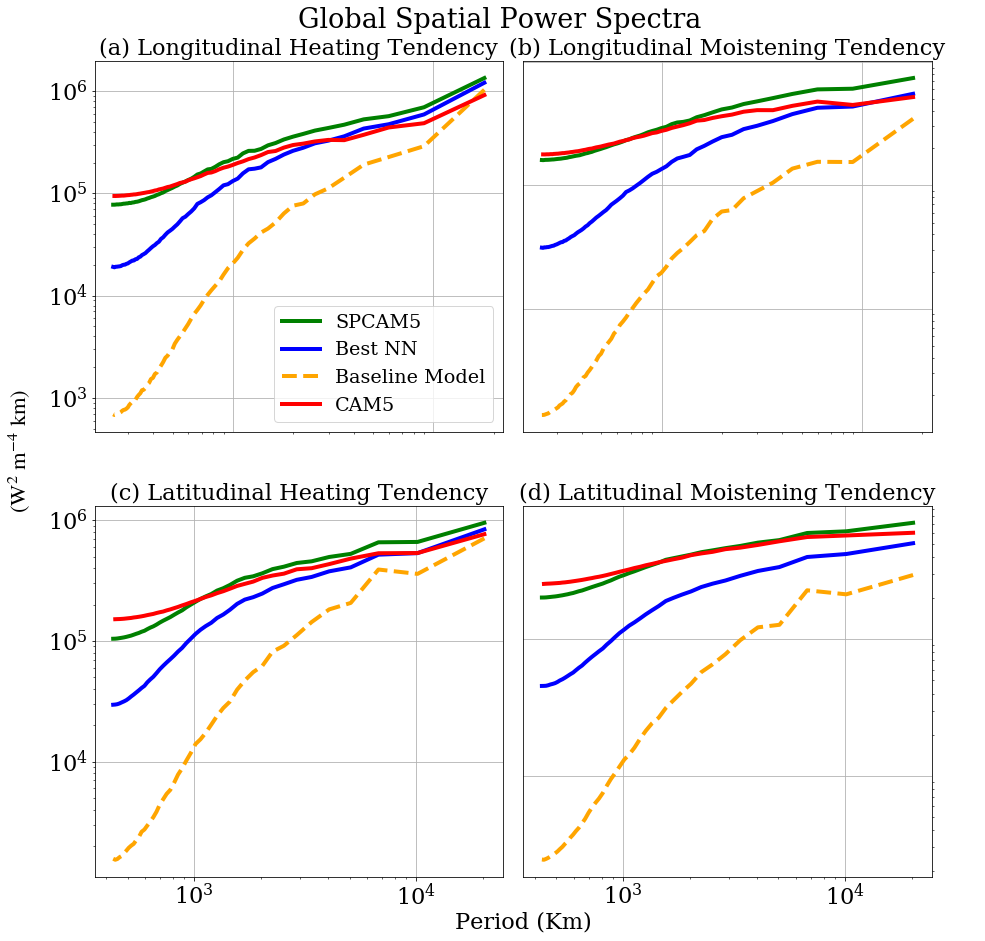

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].plot(1/SPCAM5_X_Freqs, Sherpa_Heat_x_target_avg, label = "SPCAM5", color="green")
ax[0,0].plot(1/SPCAM5_X_Freqs, Sherpa_Heat_x_test_avg, label = "Best NN", color="blue")
ax[0,0].plot(1/SPCAM5_X_Freqs, Linear_Heat_x_test_avg, label = "Baseline Model", color="orange", linestyle='--')
ax[0,0].plot(1/CAM_Heat_lon_spacing[:-1], CAM_Heat_x_target_avg[:-1], label = "CAM5", color="red")
ax[0,0].set_title("(a) Longitudinal Heating Tendency", fontsize = fz)
ax[1,0].set_xlabel("Period (Km)")
ax[1,0].xaxis.set_label_coords(1.05,-0.095)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].legend(prop={'size': fz*0.85})
#ax[0,0].set_xticks([])
#ax[0,0].set_ylim(1e-11, 1e-5)

ax[0,1].plot(1/SPCAM5_X_Freqs, Sherpa_Moisture_x_target_avg, label = "SPCAM5", color="green")
ax[0,1].plot(1/SPCAM5_X_Freqs, Sherpa_Moisture_x_test_avg, label = "Best NN", color="blue")
ax[0,1].plot(1/SPCAM5_X_Freqs, Linear_Moisture_x_test_avg, label = "Baseline Model", color="orange", linestyle='--')
ax[0,1].plot(1/CAM_Moisture_lon_spacing[:-1], CAM_Moisture_x_target_avg[:-1], label = "CAM5", color="red")
ax[0,1].set_title("(b) Longitudinal Moistening Tendency", fontsize = fz)
ax[1,1].set_ylabel(r'$\left(\mathrm{W^{2} \ m^{-4} \ km}\right)$')
ax[0,1].yaxis.set_label_coords(-1.20,2.0)
ax[0,1].set_xscale("log")
ax[0,1].set_yscale("log")
ax[0,1].yaxis.tick_right()
#ax[0,1].set_xticks([])
#ax[0,1].set_ylim(1e-17, 1e-12)

ax[1,0].plot(1/SPCAM5_Y_Freqs, Sherpa_Heat_y_target_avg, color="green")
ax[1,0].plot(1/SPCAM5_Y_Freqs, Sherpa_Heat_y_test_avg, color="blue")
ax[1,0].plot(1/SPCAM5_Y_Freqs, Linear_Heat_y_test_avg, color="orange", linestyle='--')
ax[1,0].plot(1/CAM_Heat_lat_spacing[:-1], CAM_Heat_y_target_avg[:-1], color="red")
ax[1,0].set_title("(c) Latitudinal Heating Tendency", fontsize = fz)
#ax[0,0].set_xlabel("Period (Days)")
#ax[0,0].xaxis.set_label_coords(1.05,-0.095)
ax[1,0].set_xscale("log")
ax[1,0].set_yscale("log")
#ax[0,0].legend(prop={'size': fz*0.9})
#ax[1,0].set_ylim(1e-11, 1e-5)

ax[1,1].plot(1/SPCAM5_Y_Freqs, Sherpa_Moisture_y_target_avg, color="green")
ax[1,1].plot(1/SPCAM5_Y_Freqs, Sherpa_Moisture_y_test_avg, color="blue")
ax[1,1].plot(1/SPCAM5_Y_Freqs, Linear_Moisture_y_test_avg, color="orange", linestyle='--')
ax[1,1].plot(1/CAM_Moisture_lat_spacing[:-1], CAM_Moisture_y_target_avg[:-1], color="red")
ax[1,1].set_title("(d) Latitudinal Moistening Tendency", fontsize = fz)
#ax[0,1].set_ylabel(r'$\left(\mathrm{w^{2} \ m^{-2} \ day^{-1}}\right)$')
ax[1,1].yaxis.set_label_coords(-1.20,1.15)
ax[1,1].set_xscale("log")
ax[1,1].set_yscale("log")
ax[1,1].yaxis.tick_right()
#ax[1,1].set_ylim(1e-17, 1e-12)

#ymin=0
#ymax=1e4
#ax[0,0].set_ylim(ymin, ymax)
#ax[0,1].set_ylim(ymin, ymax)
#ax[1,0].set_ylim(ymin, ymax)
#ax[1,1].set_ylim(ymin, ymax)


#ax[0,1].set_yticks([])
#ax[1,1].set_yticks([])
#ax[2,1].set_yticks([])

#ax[0,0].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')
#ax[0,1].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')
#ax[1,0].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')
#ax[1,1].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')
#ax[2,0].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')
#ax[2,1].vlines(x=1, ymin=ymin, ymax=ymax, color='black', linestyle='-')

ax[0,0].tick_params(axis='x', colors=(0,0,0,0))
#ax[0,0].tick_params(axis='y', colors=(0,0,0,0))
ax[0,1].tick_params(axis='x', colors=(0,0,0,0))
ax[0,1].tick_params(axis='y', colors=(0,0,0,0))
#ax[1,0].tick_params(axis='x', colors=(0,0,0,0))
#ax[1,0].tick_params(axis='y', colors=(0,0,0,0))
#ax[1,1].tick_params(axis='x', colors=(0,0,0,0))
ax[1,1].tick_params(axis='y', colors=(0,0,0,0))


ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)


plt.suptitle("Global Spatial Power Spectra", y=0.93)
plt.subplots_adjust(wspace=0.05)

#plt.savefig("Revised_Figures/Figure4.png")
#plt.savefig("Revised_Figures/Figure4.pdf")

In [29]:
def LSD(sig_1, sig_2):
    LSE = 0
    for i in range(len(sig_1)):
        LSE += (np.log(sig_1[i]/sig_2[i]))**2
    LSE = LSE/len(sig_1)
    LSE= LSE**0.5
    print("Log Spectral Distance is", LSE)
    return LSE

LSD(Sherpa_Heat_x_target_avg, Sherpa_Heat_x_test_avg)
LSD(Sherpa_Heat_x_target_avg, Linear_Heat_x_test_avg)

LSD(Sherpa_Heat_y_target_avg, Sherpa_Heat_y_test_avg)
LSD(Sherpa_Heat_y_target_avg, Linear_Heat_y_test_avg)

LSD(Sherpa_Moisture_x_target_avg, Sherpa_Moisture_x_test_avg)
LSD(Sherpa_Moisture_x_target_avg, Linear_Moisture_x_test_avg)

LSD(Sherpa_Moisture_y_target_avg, Sherpa_Moisture_y_test_avg)
LSD(Sherpa_Moisture_y_target_avg, Linear_Moisture_y_test_avg)

print(" ")

Log Spectral Distance is 0.9651869321491348
Log Spectral Distance is 3.5269587060486347
Log Spectral Distance is 0.8285019439676227
Log Spectral Distance is 3.0723427517749085
Log Spectral Distance is 1.204753040079373
Log Spectral Distance is 3.687804289456863
Log Spectral Distance is 1.0790506744901065
Log Spectral Distance is 3.3612379642773167
 
